In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip
from scipy.stats import norm

# to show plots:
get_ipython().magic(u'pylab inline')

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 5.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams['legend.fancybox'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Resolution matters 

## Single reference jet pT

Let's try a simple MC experiment. Take lots of reference jets with a single pT, and then generate L1 jets from them by randomly sampling a normal distribution with centre = true jet pT, and playing around with the width (the width of the Gaussian used to simulate L1 jet pTs) Basically we imagine we have a set of matching jets, where all the ref jets have the same pT:

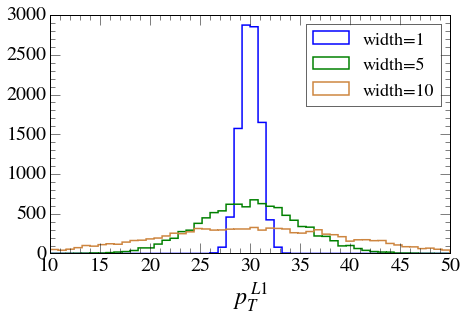

In [26]:
true_pt = 30.0
N = 10000
l1jets_1 = np.random.normal(loc=true_pt, scale=1, size=N)
l1jets_2 = np.random.normal(loc=true_pt, scale=2, size=N)
l1jets_5 = np.random.normal(loc=true_pt, scale=5, size=N)
l1jets_10 = np.random.normal(loc=true_pt, scale=10, size=N)
plt.hist(l1jets_1, bins=50, range=[10,50], normed=False, label='width=1', histtype="step", linewidth=1.5)
# plt.hist(l1jets_2, bins=50, color='red', range=[10,50], normed=False, label='width=2', histtype="step", linewidth=1.5)
plt.hist(l1jets_5, bins=50, color='green', range=[10,50], normed=False, label='width=5', histtype="step", linewidth=1.5)
plt.hist(l1jets_10, bins=50, color='peru', range=[10,50], normed=False, label='width=10', histtype="step", linewidth=1.5)
plt.xlabel(r"$p_T^{L1}$")
plt.minorticks_on()
plt.tight_layout()
plt.legend()
# plt.yscale('log')

Now we caclulate the resolution distribution and fit a Guassian to it:

In [4]:
# calculate resolution = (L1 - ref )/ L1 = 1 - (ref/L1)
refjets = np.array([true_pt]*N)
res_1 = np.ones(N)-np.divide(refjets, l1jets_1)
res_2 = np.ones(N)-np.divide(refjets, l1jets_2)
res_5 = np.ones(N)-np.divide(refjets, l1jets_5)
res_10 = np.ones(N)-np.divide(refjets, l1jets_10)

width = 1: N: 1979.46808467 mean: -0.000154081072558 sigma: 0.0334985325609 should be: 0.0333333333333
width = 5: N: 412.754442185 mean: 0.0154585038682 sigma: -0.154692751219 should be: 0.166666666667
width = 10: N: 232.013888741 mean: 0.0687478175294 sigma: -0.248190672118 should be: 0.333333333333


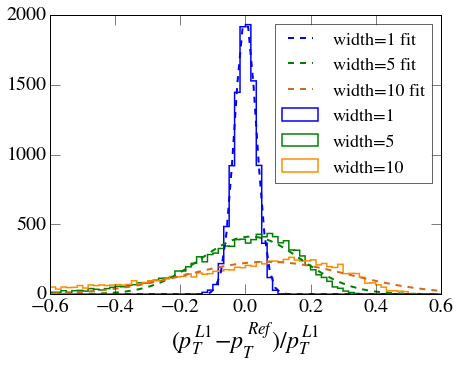

In [25]:
# plot the resolution hists
x_range=[-0.6,0.6]
nbins=72
y_1, bins_1, patches_1 = plt.hist(res_1, bins=nbins, normed=False, range=x_range, label='width=1', histtype="step", linewidth=1.5)
# y_2, bins_2, patches_2 = plt.hist(res_2, bins=nbins, normed=False, color='red', range=x_range, label='width=2', histtype="step", linewidth=1.5)
y_5, bins_5, patches_5 = plt.hist(res_5, bins=nbins, normed=False, color='green', range=x_range, label='width=5', histtype="step", linewidth=1.5)
y_10, bins_10, patches_10 = plt.hist(res_10, bins=nbins, normed=False, color='darkorange', range=x_range, label='width=10', histtype="step", linewidth=1.5)

x = [0.5 * (bins_1[i]+bins_1[i+1]) for i in range(len(bins_1)-1)]
plt.xlabel(r'$(p_{T}^{L1} - p_{T}^{Ref})/p_{T}^{L1}$')
plt.xlim(x_range)

# fit with a Gaussian
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / (2*(c**2)))
    return val

from scipy.optimize import curve_fit
popt_1, pcov_1 = curve_fit(gaussian, x, y_1)
popt_2, pcov_2 = curve_fit(gaussian, x, y_2)
popt_5, pcov_5 = curve_fit(gaussian, x, y_5)
# popt_10, pcov_10 = curve_fit(gaussian, x, y_10)
plot(x, gaussian(x, *popt_1), lw=2, color='blue', ls='--', label='width=1 fit')
# plot(x, gaussian(x, *popt_2), lw=2, color='red', ls='--', label='width=2 fit')
plot(x, gaussian(x, *popt_5), lw=2, color='green', ls='--', label='width=5 fit')
plot(x, gaussian(x, *popt_10), lw=2, color='chocolate', ls='--', label='width=10 fit')
plt.legend(loc=0, fontsize=18)
print 'width = 1: N:',popt_1[0], 'mean:', popt_1[1], 'sigma:', popt_1[2], 'should be:', 1/30.
print 'width = 5: N:',popt_5[0], 'mean:', popt_5[1], 'sigma:', popt_5[2], 'should be:', 5/30.
print 'width = 10: N:',popt_10[0], 'mean:', popt_10[1], 'sigma:', popt_10[2], 'should be:', 10/30.

So we see something interesting here:

- For a smaller width, the resolution is normally distributed

- For a larger width, the resolution looks less normal - more skewed towards smaller values of resolution (i.e. response $ = \mathrm{L1}/\mathrm{RefJet}\to 0$). The mean also deviates more from 0 at larger widths.

**So for worse inherent resolution (calibration?), plotting $(p_{T}^{L1} - p_{T}^{Ref})/p_{T}^{L1}$ becomse a bit useless for poor-resolution (or calibration?) jets.** (at least, for the purposes of trying to fit a Gaussian)

What about if we use the difference instead?

In [6]:
diff_1 = l1jets_1 - refjets
diff_2 = l1jets_2 - refjets
diff_5 = l1jets_5 - refjets
diff_10 = l1jets_10 - refjets

width = 1: N: 2345.80015188 mean: -0.0202941384645 sigma: -1.02226427057
width = 2: N: 1211.10959277 mean: -0.0217052953797 sigma: 1.96820969563
width = 5: N: 476.417473536 mean: 0.011716071489 sigma: 5.02595232571
width = 10: N: 241.187088352 mean: 0.0926608208753 sigma: -9.85140939081


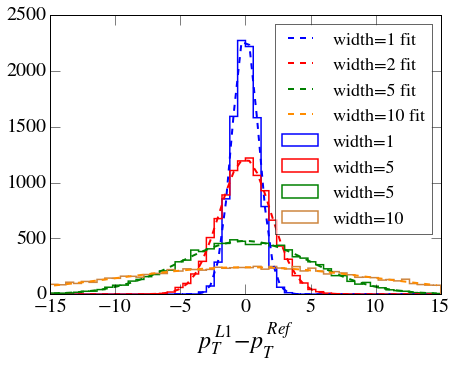

In [21]:
x_range=[-15,15]
nbins=50
y_1, bins_1, patches_1 = plt.hist(diff_1, bins=nbins, normed=False, range=x_range, label='width=1', histtype="step", linewidth=1.5)
y_2, bins_2, patches_2 = plt.hist(diff_2, bins=nbins, normed=False, color='red', range=x_range, label='width=5', histtype="step", linewidth=1.5)
y_5, bins_5, patches_5 = plt.hist(diff_5, bins=nbins, normed=False, color='green', range=x_range, label='width=5', histtype="step", linewidth=1.5)
y_10, bins_10, patches_10 = plt.hist(diff_10, bins=nbins, normed=False, color='peru', range=x_range, label='width=10', histtype="step", linewidth=1.5)
x = [0.5 * (bins_1[i]+bins_1[i+1]) for i in range(len(bins_1)-1)]
plt.xlabel(r'$p_T^{L1} - p_T^{Ref}$')
popt_1, pcov_1 = curve_fit(gaussian, x, y_1)
popt_2, pcov_2 = curve_fit(gaussian, x, y_2)
popt_5, pcov_5 = curve_fit(gaussian, x, y_5)
popt_10, pcov_10 = curve_fit(gaussian, x, y_10)
plot(x, gaussian(x, *popt_1), lw=2, color='blue', ls='--', label='width=1 fit')
plot(x, gaussian(x, *popt_2), lw=2, color='red', ls='--', label='width=2 fit')
plot(x, gaussian(x, *popt_5), lw=2, color='green', ls='--', label='width=5 fit')
plot(x, gaussian(x, *popt_10), lw=2, color='darkorange', ls='--', label='width=10 fit')
plt.legend(fontsize=18, loc=0)
print 'width = 1: N:',popt_1[0], 'mean:', popt_1[1], 'sigma:', popt_1[2]
print 'width = 2: N:',popt_2[0], 'mean:', popt_2[1], 'sigma:', popt_2[2]
print 'width = 5: N:',popt_5[0], 'mean:', popt_5[1], 'sigma:', popt_5[2]
print 'width = 10: N:',popt_10[0], 'mean:', popt_10[1], 'sigma:', popt_10[2]

Let's divide the width by the mean pT. This should give use a more accurate value of the resolution, since our Gaussian fit is a better assumption.

In [8]:
for x,w in zip([popt_1, popt_2, popt_5, popt_10],[1,2, 5,10]):
    print 'width =', w, 'fitted width/30 =', abs(x[2])/true_pt, " should be", w/true_pt

width = 1 fitted width/30 = 0.0340754756858  should be 0.0333333333333
width = 2 fitted width/30 = 0.0656069898544  should be 0.0666666666667
width = 5 fitted width/30 = 0.16753174419  should be 0.166666666667
width = 10 fitted width/30 = 0.328380313027  should be 0.333333333333


These are much closer to the actual value (the width of Gaussian / 30)

## With calibrations

In [27]:
# p0 = 3.32079045
# p1 = 30.10690152
# p2 = 2.91713150
# p3 = -206.73606994
# p4 = 0.00701027
# p5 = -20.22374281
# def pf_func(et, p0, p1, p2, p3, p4, p5):
#     return np.multiply(et, (p0 + (p1/(np.power(np.log10(et), 2)+p2)) + p3 * np.exp(-1.*p4*np.power(np.log10(et)-p5, 2))))
# l1jets_1_corr = pf_func(l1jets_1, p0, p1, p2, p3, p4, p5)
# l1jets_5_corr = pf_func(l1jets_5, p0, p1, p2, p3, p4, p5)
# l1jets_10_corr = pf_func(l1jets_10, p0, p1, p2, p3, p4, p5)

In [28]:
# plt.hist(l1jets_1_corr, bins=50, alpha=0.3, range=[10,60], normed=False, label='width=1')
# plt.hist(l1jets_5_corr, bins=50, alpha=0.3, color='green', range=[10,60], normed=False, label='width=5')
# plt.hist(l1jets_10_corr, bins=50, alpha=0.3, color='orange', range=[10,60], normed=False, label='width=10')
# plt.xlabel(r"$p_T^{L1}$")
# plt.minorticks_on()
# plt.tight_layout()
# plt.legend(loc=0)

In [29]:
# # calculate resolution = (L1 - ref )/ L1 = 1 - (ref/L1)
# # refjets = np.array([true_pt]*N)
# res_1_corr = np.ones(N)-np.divide(refjets, l1jets_1_corr)
# res_5_corr = np.ones(N)-np.divide(refjets, l1jets_5_corr)
# res_10_corr = np.ones(N)-np.divide(refjets, l1jets_10_corr)

In [30]:
# # plot the resolution hists
# y_1_corr, bins_1_corr, _ = plt.hist(res_1_corr, bins=60, normed=False, alpha=0.3, range=[-0.1,0.5], label='width=1')
# y_5_corr, bins_5_corr, _ = plt.hist(res_5_corr, bins=60, normed=False, alpha=0.3, color='green', range=[-0.1,0.5], label='width=5')
# y_10_corr, bins_10_corr, _ = plt.hist(res_10_corr, bins=60, normed=False, alpha=0.4, color='orange', range=[-0.1,0.5], label='width=10')

# x = [0.5 * (bins_1_corr[i]+bins_1_corr[i+1]) for i in range(len(bins_1_corr)-1)]
# plt.xlabel(r'$(p_{T}^{L1} - p_{T}^{Ref})/p_{T}^{L1}$')
# plt.legend(loc=0)
# # plt.yscale('log')
# # plt.ylim(bottom=2E1, top=3E3)
# # plt.xlim(-0.6,0.3)

# # fit with a Gaussian
# def gaussian(x, a, b, c):
#     val = a * np.exp(-(x - b)**2 / (2*(c**2)))
#     return val

# from scipy.optimize import curve_fit
# popt_1_corr, pcov_1_corr = curve_fit(gaussian, x, y_1_corr)
# popt_5_corr, pcov_5_corr = curve_fit(gaussian, x, y_5_corr)
# popt_10_corr, pcov_10_corr = curve_fit(gaussian, x, y_10_corr)
# plot(x, gaussian(x, *popt_1_corr), lw=1, color='blue', ls='--')
# plot(x, gaussian(x, *popt_5_corr), lw=1, color='green', ls='--')
# plot(x, gaussian(x, *popt_10_corr), lw=1, color='darkorange', ls='--')
# print 'width = 1: N:',popt_1_corr[0], 'mean:', popt_1_corr[1], 'sigma:', popt_1_corr[2], 'should be:', 1/30.
# print 'width = 5: N:',popt_5_corr[0], 'mean:', popt_5_corr[1], 'sigma:', popt_5_corr[2], 'should be:', 5/30.
# print 'width = 10: N:',popt_10_corr[0], 'mean:', popt_10_corr[1], 'sigma:', popt_10_corr[2], 'should be:', 10/30.

## Bit more realistic

Let's repeat, but instead of a single ref jet value, we'll have a uniform ref jet distribution over 14 - 22 GeV:

In [13]:
N = 10000
refjets2 = np.random.uniform(14,22,N)
# print np.random.normal(20,1,1)
l1jets2_1 = np.array([np.random.normal(pt, scale=1, size=1)[0] for pt in refjets2])
l1jets2_5 = np.array([np.random.normal(pt, scale=5, size=1)[0] for pt in refjets2])
l1jets2_10 = np.array([np.random.normal(pt, scale=10, size=1)[0] for pt in refjets2])

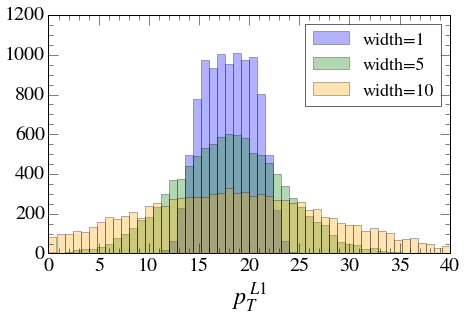

In [14]:
plt.hist(l1jets2_1, bins=50, alpha=0.3, range=[0,40], label='width=1')
plt.hist(l1jets2_5, bins=50, alpha=0.3, color='green', range=[0,40], label='width=5')
plt.hist(l1jets2_10, bins=50, alpha=0.3, color='orange', range=[0,40], label='width=10')
plt.xlabel(r"$p_T^{L1}$")
plt.minorticks_on()
plt.tight_layout()
plt.legend()

Let's do the same experiment - first our 'standard' resolution:

In [15]:
# calculate resolution = (L1 - ref )/ L1 = 1 - (ref/L1)
res2_1 = np.ones(N)-np.divide(refjets2, l1jets2_1)
res2_5 = np.ones(N)-np.divide(refjets2, l1jets2_5)
res2_10 = np.ones(N)-np.divide(refjets2, l1jets2_10)

width = 1: N: 2297.03021992 mean: 0.00161407552062 sigma: 0.054739971388 should be: 0.0555059069016
width = 5: N: 510.337690964 mean: 0.0417599543558 sigma: 0.226895477255 should be: 0.277529534508
width = 10: N: 293.042980596 mean: 0.196975633156 sigma: 0.386537577763 should be: 0.555059069016


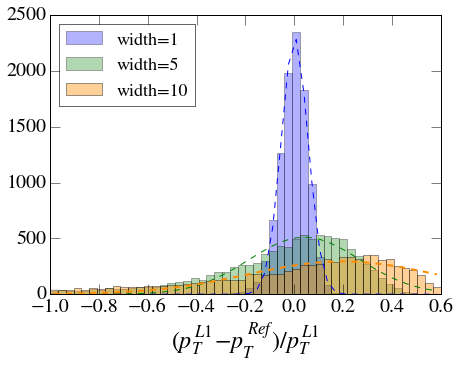

In [16]:
# plot the resolution hists
y2_1, bins2_1, patches2_1 = plt.hist(res2_1, bins=50, normed=False, alpha=0.3, range=[-1,0.6], label='width=1')
y2_5, bins2_5, patches2_5 = plt.hist(res2_5, bins=50, normed=False, alpha=0.3, color='green', range=[-1,0.6], label='width=5')
y2_10, bins2_10, patches2_10 = plt.hist(res2_10, bins=50, normed=False, alpha=0.4, color='darkorange', range=[-1,0.6], label='width=10')

x = [0.5 * (bins2_1[i]+bins2_1[i+1]) for i in range(len(bins2_1)-1)]
plt.xlabel(r'$(p_{T}^{L1} - p_{T}^{Ref})/p_{T}^{L1}$')
plt.legend(loc=0)
# plt.yscale('log')
# plt.ylim(bottom=2E1, top=3E3)
plt.xlim(-1,0.6)

# fit with a Gaussian
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / (2*(c**2)))
    return val

from scipy.optimize import curve_fit
popt2_1, pcov2_1 = curve_fit(gaussian, x, y2_1)
popt2_5, pcov2_5 = curve_fit(gaussian, x, y2_5)
popt2_10, pcov2_10 = curve_fit(gaussian, x, y2_10)
plot(x, gaussian(x, *popt2_1), lw=1, color='blue', ls='--')
plot(x, gaussian(x, *popt2_5), lw=1, color='green', ls='--')
plot(x, gaussian(x, *popt2_10), lw=2, color='darkorange', ls='--')
print 'width = 1: N:',popt2_1[0], 'mean:', popt2_1[1], 'sigma:', popt2_1[2], 'should be:', 1./np.mean(refjets2)
print 'width = 5: N:',popt2_5[0], 'mean:', popt2_5[1], 'sigma:', popt2_5[2], 'should be:', 5./np.mean(refjets2)
print 'width = 10: N:',popt2_10[0], 'mean:', popt2_10[1], 'sigma:', popt2_10[2], 'should be:', 10./np.mean(refjets2)

So again, we can see that for small inherent widths, the quantity is sensible. But for larger widths, it starts to become skewed. Let's try the same trick, just fitting the pt difference.

In [17]:
diff2_1 = l1jets2_1 - refjets2
diff2_5 = l1jets2_5 - refjets2
diff2_10 = l1jets2_10 - refjets2

width = 1: N: 1340.20609045 mean: -0.00141688125526 sigma: 0.989399301072
width = 5: N: 271.375226698 mean: -0.0352765280325 sigma: -4.89191800343
width = 10: N: 130.950239543 mean: 0.0328554078958 sigma: -10.0842970947


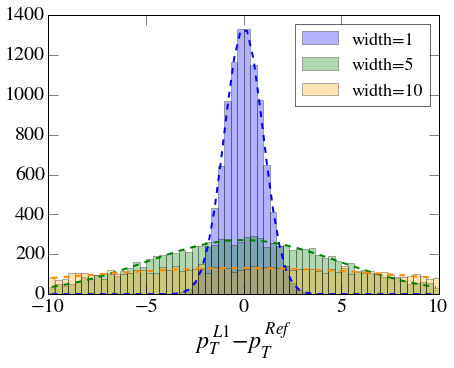

In [18]:
y2_1, bins2_1, patches2_1 = plt.hist(diff2_1, bins=60, normed=False, alpha=0.3, range=[-10,10], label='width=1')
y2_5, bins2_5, patches2_5 = plt.hist(diff2_5, bins=60, normed=False, alpha=0.3, color='green', range=[-10,10], label='width=5')
y2_10, bins2_10, patches2_10 = plt.hist(diff2_10, bins=60, normed=False, alpha=0.3, color='orange', range=[-10,10], label='width=10')
x = [0.5 * (bins2_1[i]+bins2_1[i+1]) for i in range(len(bins2_1)-1)]
plt.xlabel(r'$p_T^{L1} - p_T^{Ref}$')
popt2_1, pcov2_1 = curve_fit(gaussian, x, y2_1)
popt2_5, pcov2_5 = curve_fit(gaussian, x, y2_5)
popt2_10, pcov2_10 = curve_fit(gaussian, x, y2_10)
plot(x, gaussian(x, *popt2_1), lw=2, color='blue', ls='--')
plot(x, gaussian(x, *popt2_5), lw=2, color='green', ls='--')
plot(x, gaussian(x, *popt2_10), lw=2, color='darkorange', ls='--')
plt.legend()
print 'width = 1: N:',popt2_1[0], 'mean:', popt2_1[1], 'sigma:', popt2_1[2]
print 'width = 5: N:',popt2_5[0], 'mean:', popt2_5[1], 'sigma:', popt2_5[2]
print 'width = 10: N:',popt2_10[0], 'mean:', popt2_10[1], 'sigma:', popt2_10[2]

Again, we take the fitted mean and divide by the mean of the ref jets

In [19]:
from itertools import product, izip
for x,j,w in izip([popt2_1, popt2_5, popt2_10], [l1jets2_1, l1jets_5, l1jets_10], [1,5,10]):
    print 'width =', w, 'fitted width/<ref jets> =', abs(x[2])/np.mean(refjets2), " should be", w/np.mean(refjets2)
    print 'width =', w, 'fitted width/<l1 jets> =', abs(x[2])/np.mean(j), " should be", w/np.mean(j)

width = 1 fitted width/<ref jets> = 0.0549175054938  should be 0.0555059069016
width = 1 fitted width/<l1 jets> = 0.0549239709277  should be 0.055512441608
width = 5 fitted width/<ref jets> = 0.271530345269  should be 0.277529534508
width = 5 fitted width/<l1 jets> = 0.163107352835  should be 0.166711045361
width = 10 fitted width/<ref jets> = 0.559738055704  should be 0.555059069016
width = 10 fitted width/<l1 jets> = 0.337090683765  should be 0.334272860667


So it appears that if we want to reconstruct the inherent resolution, we should really divide by the average ref jet pT